In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats

In [65]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4)

In [66]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


## Preparing data set

Preparing a data set to use with linear regression(multivariable), we're using these variables: Population, Murder, robbery, and Property crime. We will use these to predict our target variable, property crime. 

In [67]:
#removing first rape column every entry was NAN
df = df.drop('Rape\n(revised\ndefinition)1', axis=1)

#removing last three rows NAN values
df = df.drop([348,349,350])

#renaming columns
df.columns = ['City', 'Population', 'Violent', 'Murder', 'Rape', 'Robbery', 'Aggravated assault',
              'Property crime', 'Burglary','Larceny theft', 'Motor vehicle theft', 'Arson']

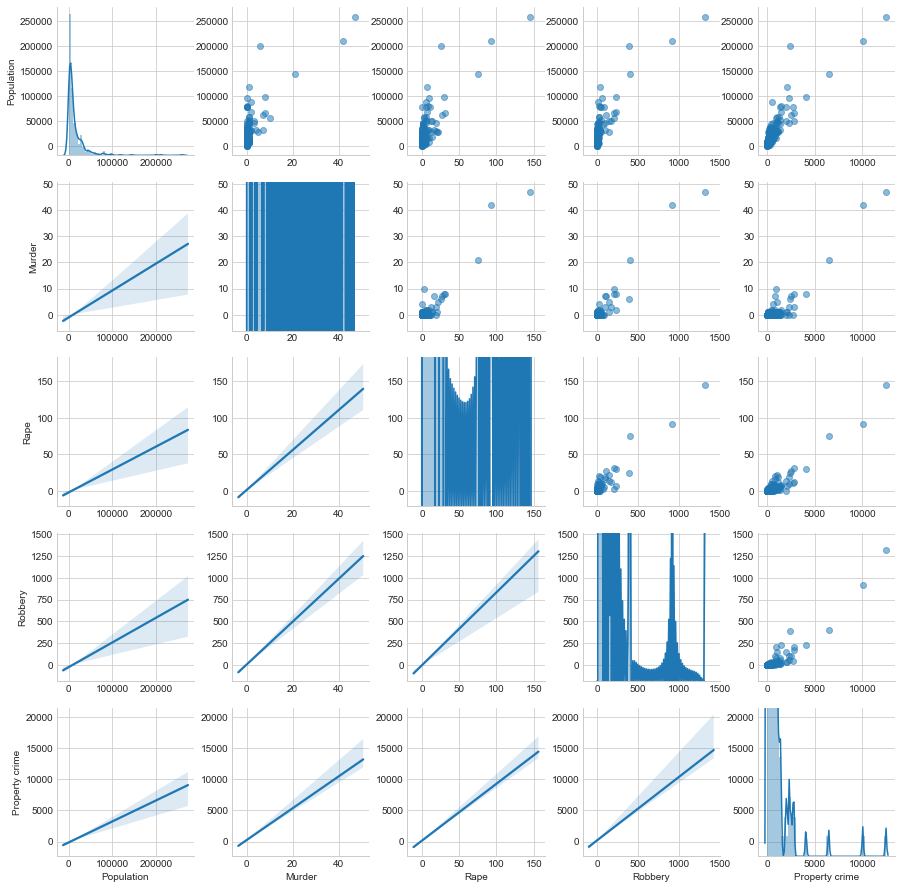

In [68]:
#Reducing dataframe columns to variables of interest
newdf = df[['City', 'Population', 'Murder', 'Rape', 'Robbery', 'Property crime']]

#droping newyork city outlier, to better read graphs.
newdf = newdf.drop(216)

#Plotting scatter plot matrix
g = sns.PairGrid(newdf)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.distplot)
plt.show()

## Feature extraction

Squaring populations, Changing murder and robbery to binary categorical features

In [69]:
#squaring population
df['Pop_squared'] = df['Population'] * df['Population']
#Creating binary categorical feature out of continuous variable columns, murder and robbery.
df['Murder_f'] = np.where((df['Murder'] == 0), 0, 1)
df['robbery_f']  = np.where((df['Robbery'] == 0), 0, 1)

In [72]:
#Reducing columns
df = df[['City', 'Property crime', 'Population', 'Pop_squared', 'Murder_f', 'robbery_f']]
df.head()

,City,Property crime,Population,Pop_squared,Murder_f,robbery_f
0,Adams Village,12.0,1861.0,3.463321e+06,0,0
1,Addison Town and Village,24.0,2577.0,6.640929e+06,0,0
2,Akron Village,16.0,2846.0,8.099716e+06,0,0
3,Albany,4090.0,97956.0,9.595378e+09,1,1
4,Albion Village,223.0,6388.0,4.080654e+07,0,1
